# SPRING 2021
# Applied Machine Learning, HW 4

*Instructions:* Read all problems very carefully. Make sure that you are answering all questions included in a given problem. Every problem has a code cell inserted at the very end. You must show your solution in the code cell and run the cell by pressing the SHIFT and ENTER buttons simultaneously. The output of the cell must demonstrate the correctness of your solution. If you need to insert more code cells -- feel free to do so.

**Problem 1** 
1. Create 3 NumPy arrays of random integers unifromly distributed from 1 to 10 (exclusive) with the following shapes:
  *  (4, 7)
  * (7,)
  * (4, )

  Set your random seed to 42 right before you create every one of these arrays (it means that you will need to set the random seed value three times). Call the created arrays `matrix`, `row`, and `column`, respectively and print them to the screen. 
2. In a new code cell, add the (7, ) array to every row of the (4, 7) array in the most efficient way. Print the result to the screen, inspect it and make sure that it makes sense to you.
3. In a new code cell, add the (4, ) array to every colum of the (4, 7) array in the most efficient way. Print the result to the screen, inspect it and make sure that it makes sense to you. *Hint:* You might want to review the NumPy rules for broadcasting before attempting to solve this problem. In order to use broadcasting here, you will need to do some very minor reshaping in the beginning.

In [ ]:
import numpy as np
np.random.seed(42)
matrix = np.random.randint(1,10, size=(4,7))
row = np.random.randint(1,10, size=(7,))
column = np.random.randint(1,10, size=(4,))

print(matrix)
print('\n')
print(row)
print('\n')
print(matrix + row)
print('\n')
print(column)
print('\n')
print(column.reshape((4,1)) + matrix)


[[7 4 8 5 7 3 7]
 [8 5 4 8 8 3 6]
 [5 2 8 6 2 5 1]
 [6 9 1 3 7 4 9]]


[3 5 3 7 5 9 7]


[[10  9 11 12 12 12 14]
 [11 10  7 15 13 12 13]
 [ 8  7 11 13  7 14  8]
 [ 9 14  4 10 12 13 16]]


[2 4 9 2]


[[ 9  6 10  7  9  5  9]
 [12  9  8 12 12  7 10]
 [14 11 17 15 11 14 10]
 [ 8 11  3  5  9  6 11]]


**Problem 2**
1. Create a NumPy array of angles from 0 to 45 degrees. Call it `angles_degs`.
2. Convert all of these angles to radians, saving the result in a new array called `angles_rads`. Recall that the formula for converting an angle $\phi$ from degrees to radians is
$$
\phi \text{ in radians} = \phi^{\circ} \frac{\pi}{180^{\circ}}
$$
To get the mathematical constant $\pi$ in Python you need to import `math` library and then call `math.pi`. Print `angles_rads` to the screen.
3. Now you will need to verify the following trigonometric identity for all of these angles:
$$
1 + \tan^2\!\theta = \frac{1}{\cos^2\!\theta}\;.
$$
To do that, compute the NumPy array for the left hand-side of this identity; then do the same for the right-hand side. Call these arrays `lhs` and `rhs`, respectively. After the arrays are computed, subtract `rhs` from `lhs`, take the absolute value, and save the result in a new array called `diff_abs`. Then demonstrate that all elements of `diff_abs` are smaller than `1e-15`, which is, roughly, the computational precision. Do all this work in a new code cell.

In [ ]:
import numpy as np
import math 
angles_degs = np.arange(0,46)
angles_rads = angles_deg * (math.pi / 180)
print(angles_rads)
print('\n')
lhs = 1 + (np.tan(angles_rads) ** 2)
rhs = 1 / (np.cos(angles_rads) ** 2)
diff_abs = abs(lhs - rhs)
if diff_abs.all() > 1e-15:
  print("did not work")
else:
  print(diff_abs)

[0.         0.01745329 0.03490659 0.05235988 0.06981317 0.08726646
 0.10471976 0.12217305 0.13962634 0.15707963 0.17453293 0.19198622
 0.20943951 0.2268928  0.2443461  0.26179939 0.27925268 0.29670597
 0.31415927 0.33161256 0.34906585 0.36651914 0.38397244 0.40142573
 0.41887902 0.43633231 0.45378561 0.4712389  0.48869219 0.50614548
 0.52359878 0.54105207 0.55850536 0.57595865 0.59341195 0.61086524
 0.62831853 0.64577182 0.66322512 0.68067841 0.6981317  0.71558499
 0.73303829 0.75049158 0.76794487 0.78539816]


[0.00000000e+00 2.22044605e-16 0.00000000e+00 0.00000000e+00
 2.22044605e-16 0.00000000e+00 0.00000000e+00 2.22044605e-16
 2.22044605e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.22044605e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.22044605e-16 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.22044605e-16 0.00000000e+00
 2.22044605e-16 2.22044605e-16 0.00000000e+00 2.22044605e-16
 2.22044605e-16 0.00000000e+00 2.22044605e-16 0.00000000

**Problem 3**

1. Using a random seed value of 2021, pull one million random values from a normal distribution with a mean of 42 and a standard deviation of 3.7 and save the result in a NumPy array called `rand_norm`.
2. Print to the screen the following sentence: "The mean value is ???, the standard deviation is ???, and the size of the array is ???.", where all triple-question-mark symbols must be replaces with the actual values *computed* on this random array. Limit the number of decimals shown to 3 (see the example given below illustrating how one can limit the number of decimals to 5 for a variable `value = 0.23243733521`). Does the result make sense?
3. Are there any negative numbers is this array? Prove it! (Use a new code cell).
4. Start a new code cell. How many elements of `rand_norm` fall within one standard deviation from the mean? In other words, how many elements of `rand_norm` are between `42-3.7` and `42+3.7` (include the end points of the interval)? 
5. Divide your answer for the previous part by the total number of elements in `rand_norm` to get the total percentage of the data points that fall within one standard deviation from the mean. Is it close to 68 per cent (it'd better be!)?
6. Start a new code cell. Select the elements of `rand_int` that fall within two standard deviation from the mean and save the result in a new array called `two_std`. Compute the median, the standard deivation, the minimum and maximum values, and the total length of `two_std` and print all these results to the screen (in this order!).

In [ ]:
# Example (how to limit the number of decimals when printing)

value = 0.23243733521
# Keeping only 5 decimals:
print(f"The variable 'value' is approximately equal to {value:.5f}.")

The variable 'value' is approximately equal to 0.23244.


In [ ]:
import numpy as np
np.random.seed(2021)
rand_norm = np.random.normal(loc=42.0, scale=3.7, size=1 * 10**6)
print("the mean value is " + str(rand_norm.mean()) + ", " + "the standard deviation is "+ str(np.std(rand_norm)) + ", " + "the size of the array is "+ str(rand_norm.size ))



the mean value is 41.99592556000007, the standard deviation is 3.7008269232834463, the size of the array is 1000000


In [ ]:
import numpy as np
np.random.seed(2021)
rand_norm = np.random.normal(loc=42.0, scale=3.7, size=1 * 10**6)
print(rand_norm[rand_norm < 0])
devs = rand_norm[(rand_norm >= 42-3.7) * (rand_norm <= 42+3.7)]
print(devs.size)
print('\n')
print(devs.size / rand_norm.size)
two_std = rand_norm[(rand_norm >=  42 - 7.4) * (rand_norm <=  42+7.4)]
print("second array stats"+ '\n')
print("median is :", np.median(two_std))
print("standard deviation is :", np.std(two_std))
print("the min is :", two_std.min())
print("the max is :", two_std.max())
print("the total length is :", two_std.size)

[]
682681


0.682681
second array stats

median is : 41.99680328190451
standard deviation is : 3.2537329907444463
the min is : 34.60000777478271
the max is : 49.39994375621337
the total length is : 954349


**Problem 4**
In class, we saw an example of a scatter plot illustrating the relationship between the horsepower and the displacement values in the Auto MPG data set. In this problem, you are asked to create a similar plot for the miles-per-galon (MPG) and weight data from the same data set.
1. Mount your Google Drive to Google Colab.
2. Create a new `Path` object using the `pathlib` library using the following path: 

  `'/content/gdrive/Shared drives/Applied_Machine_Learning/Data/Auto_MPG'`

  This path points to the directory with the Auto MPG data. 
3. Load the MPG and weight data from the `'mpg.npy'` and `'weight.npy'` files located in the above-mentioned directory. Save the data in the form of two NumPy arrays named `mpg` and `weight`. (I must tell you that this is the first time when I am experimenting with 'Shared drives', so I am not 100% certain that the path provided above will work. If it does not work then just manually copy the NumPy array files from the shared folder to some folder on your Google Drive, adjust the path accordingly, and then load the files from the new location. )
4. Using `matplotlib.pyplot` package create a scatter plot of the data treating `weight` as your independent variable and `mpg` as your dependent variable.
5. Label your horizontal and vertical axes as "Weight" and "MPG", respectively. Make the fontsize to be equal to 17. 
6. Add a title to the plot saying "Auto MPG data: city-cycle". Make the fontsize to be equal to 22. 
7. Set the size of the plot to be 7 by 7 and don't forget to include `plt.show()` at the very end!
8. Based on what you see, do you think fitting these data with a straight line would be a good idea?

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Text(0.5, 1.0, 'Auto MPG data: city-cycle')

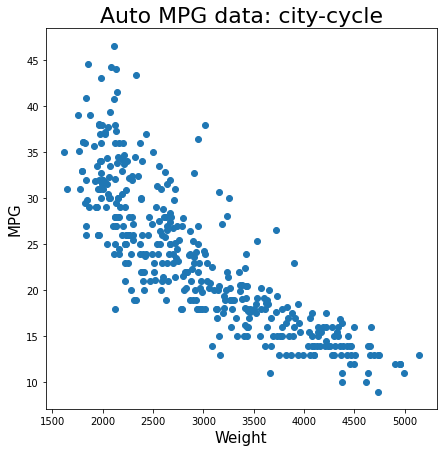

In [ ]:
import numpy as np
from google.colab import drive
from pathlib import Path 
import matplotlib.pyplot as plt
%matplotlib inline 
drive.mount('/content/gdrive')

PATH = Path('/content/gdrive/My Drive/Colab Notebooks/Auto_MPG')
mpg = np.load(PATH/'mpg.npy')
weight = np.load(PATH/'weight.npy')
plt.figure(figsize=(7,7))
plt.plot(weight,mpg,'o')
plt.xlabel("Weight", fontsize=15)
plt.ylabel("MPG", fontsize=15)
plt.title("Auto MPG data: city-cycle",fontsize=22)

I don't think a straight line would be best fit for the data, a curved line would be better to describe it.
